In [1]:
from astrodbkit import astrodb #Imports specific scetion from "Astrodbkit" library

In [2]:
import pandas as pd #Imports the pandas library

### Main variables are [ OPT_spectraltype, NIR_spectraltype, IR_spectraltype ]

In [3]:
db = astrodb.Database("bdnycdev1.db") #Creates a database

Database ready for use


In [4]:
db.info() # Gives list of all the tables with the amt of info in each one


Database path: bdnycdev1.db 
SQL path: bdnycdev1.sql

Database Inventory
SOURCES: 1938
CHANGELOG: 205
DATA_REQUESTS: 27
IGNORE: 122
INSTRUMENTS: 54
MODES: 7
PARALLAXES: 436
PHOTOMETRY: 10358
PROPER_MOTIONS: 599
PUBLICATIONS: 607
RADIAL_VELOCITIES: 143
SPECTRA: 3614
SPECTRAL_TYPES: 1511
SYSTEMS: 15
TELESCOPES: 38
VERSIONS: 2


In [5]:
db.query("SELECT * FROM sources LIMIT 10", fmt = "pandas") #Gives a list of 10 rows w/ names

,comments,companions,components,dec,designation,id,names,publication_shortname,ra,shortname,unum,version
0,,None,None,18.333275,SDSS J16585026+1820006,1,SDSS J16585026+1820006,West08,254.709737,1658+1820,U51440,2.0
1,,None,None,-1.280556,2MASS J13314894-0116500,2,"SDSS J133148.92-011651.4, 2MASS J13314894-0116500",Hawl02,202.953870,1331-0116,U50174,2.0
2,None,None,"1619,1620",-4.105361,2MASS J23310161-0406193,3,2MASS J23310161-0406193,Gizi00,352.756710,2331-0406,U12191,2.0
3,None,None,None,10.533056,2MASS J14482563+1031590,4,"2MASS J14482563+1031590, 2MASSW J1448256+10315...",Wils03b,222.106791,1448+1031,U20587,1.0
4,None,None,None,3.281762,2MASS J14432796+0316543,5,LSPM J1443+0316,LSPM-N,220.866530,1443+0316,U20585,2.0
5,None,None,"1577,1578",-9.766389,DENIS-P J144137.2-094558,6,"G 124-62B, DENIS-P J144137.3-094559",Mart99b,220.404834,1441-0945,U20582,2.0
6,None,None,None,19.487472,2MASS J14392836+1929149,7,"2MASS J14392837+1929150, 2MASSW J1439284+192915",Kirk99a,219.868167,1439+1929,U20581,1.0
7,None,None,None,8.666389,2MASS J17281134+0839590,8,None,Reid08b,262.047250,1728+0839,U20740,2.0
8,None,None,None,7.430889,2MASS J13082507+0725512,9,None,Reid08b,197.104460,None,U20468,2.0
9,None,None,None,27.356472,2MASS J17312974+2721233,10,"2MASS J17312974+2721233, LSPM J1731+2721",Reid08b,262.873917,1731+2721,U20744,2.0


In [6]:
OPT_spectraltype = db.query("select sources.id as source_id, \
    shortname, spectral_type, ra, dec from sources \
    join spectral_types on sources.id=spectral_types.source_id \
    where regime='OPT' order by source_id", fmt='pandas')

#Creates a variable of Optical data
#Join combines tables into one -- Matches IDs together

OPT_spectraltype 

,dec,ra,shortname,source_id,spectral_type
0,18.333275,254.709737,1658+1820,1,10.0
1,-1.280556,202.953870,1331-0116,2,16.0
2,10.533056,222.106791,1448+1031,4,14.0
3,10.533056,222.106791,1448+1031,4,13.5
4,-9.766389,220.404834,1441-0945,6,10.5
5,19.487472,219.868167,1439+1929,7,11.0
6,27.356472,262.873917,1731+2721,10,10.0
7,-39.548306,181.889420,1207-3932,11,8.0
8,0.734611,342.472709,2249+0044,14,14.0
9,0.734611,342.472709,2249+0044,14,13.0


In [7]:
IR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, \
    ra, dec from sources join spectral_types on \
    sources.id=spectral_types.source_id where regime='IR' order \
    by source_id", fmt='pandas') #Infrared
NIR_spectraltype = db.query("select sources.id as source_id, shortname, spectral_type, \
    ra, dec from sources join spectral_types on sources.id=spectral_types.source_id \
    where regime='NIR' order by source_id", fmt='pandas') #Near Infrared

#Creates variables with Infrared and Near Infrared data

In [8]:
print("Optical (OPT): " + str(len(OPT_spectraltype)))
print("Infrared (IR): " + str(len(IR_spectraltype)))
print("Near Infrared (NIR): " + str(len(NIR_spectraltype)))

Optical (OPT): 483
Infrared (IR): 503
Near Infrared (NIR): 17


In [9]:
#Debugger to get which values are not floats

OPT_spec =[]
for i in OPT_spectraltype['spectral_type']:
    try:
        float(i)
        OPT_spec.append(float(i))
    except ValueError:
        print(i , ' cannot be converted')
        continue

L1-L4  cannot be converted
0355-type  cannot be converted


In [10]:
len(OPT_spec)

481

In [11]:
print(OPT_spec)

[10.0, 16.0, 14.0, 13.5, 10.5, 11.0, 10.0, 8.0, 14.0, 13.0, 13.0, 11.0, 9.5, 16.5, 16.0, 8.5, 8.5, 10.0, 13.0, 28.0, 28.0, 10.5, 15.0, 12.0, 16.0, 6.0, 18.0, 9.5, 9.0, 14.0, 12.0, 10.0, 10.0, 15.0, 10.0, 8.5, 9.0, 13.5, 12.0, 12.0, 13.5, 8.5, 17.0, 11.0, 10.0, 8.0, 10.0, 10.0, 12.0, 13.5, 12.5, 9.0, 10.0, 15.0, 15.0, 9.0, 11.5, 8.0, 12.0, 11.0, 8.0, 11.5, 13.0, 10.5, 10.0, 7.0, 12.0, 13.0, 9.0, 15.0, 10.5, 11.0, 7.5, 8.0, 9.0, 12.0, 13.5, 13.5, 7.0, 9.0, 6.5, 12.0, 12.0, 15.0, 10.0, 10.0, 8.0, 10.5, 9.0, 6.0, 11.5, 15.0, 9.5, 7.5, 15.0, 13.0, 10.0, 10.0, 11.5, 13.0, 12.0, 10.0, 12.0, 16.0, 6.0, 18.0, 15.0, 14.0, 10.0, 15.0, 9.0, 10.0, 9.0, 10.0, 14.0, 13.5, 18.0, 8.5, 9.0, 12.0, 15.0, 13.0, 12.0, 15.0, 10.5, 14.5, 27.0, 8.0, 27.0, 14.5, 15.0, 14.0, 11.0, 15.0, 9.0, 14.0, 10.0, 12.0, 15.0, 18.0, 16.0, 11.0, 8.0, 11.0, 8.0, 8.0, 8.0, 10.0, 10.0, 18.0, 11.0, 13.0, 17.0, 14.0, 13.0, 11.0, 11.0, 12.0, 11.0, 8.0, 14.0, 10.0, 11.0, 15.0, 10.0, 18.0, 17.0, 10.0, 14.5, 12.0, 11.0, 8.0, 11.0, 12

In [12]:
#Debugger to see which in Infrared data is not a float (decimal) 

IR_spec =[] #Empty list to add all floats to new variable
for i in IR_spectraltype['spectral_type']:
    try:
        float(i)
        IR_spec.append(float(i))
    except ValueError:
        print(i , ' cannot be converted')
        continue

L7+L8  cannot be converted


In [13]:
print(IR_spec) #Checks to see if list is only variables and that the debugger worked

[20.0, 14.0, 13.5, 8.5, 11.0, 15.0, 13.0, 8.0, 10.0, 16.0, 16.5, 9.0, 10.0, 28.0, 27.0, 27.0, 19.0, 14.5, 16.0, 9.5, 9.0, 17.5, 11.0, 10.0, 10.0, 15.0, 14.0, 21.0, 11.0, 11.0, 9.0, 9.0, 12.0, 13.0, 15.0, 11.0, 7.0, 27.0, 9.0, 9.0, 10.0, 10.5, 14.0, 9.0, 10.0, 10.0, 10.0, 16.0, 13.0, 16.0, 14.0, 6.0, 19.5, 14.0, 23.5, 13.0, 10.0, 10.0, 15.5, 18.0, 16.0, 8.5, 13.0, 14.0, 24.5, 26.5, 27.5, 20.0, 16.0, 8.5, 12.0, 12.0, 11.0, 11.0, 11.0, 12.0, 17.5, 18.0, 15.0, 11.0, 11.0, 14.0, 15.0, 10.0, 12.0, 20.0, 9.0, 14.5, 20.5, 23.0, 12.0, 14.0, 17.0, 17.0, 17.5, 8.0, 11.0, 14.0, 12.0, 15.5, 10.0, 9.0, 14.5, 10.0, 11.0, 11.0, 12.5, 10.0, 16.5, 12.0, 21.0, 22.5, 22.0, 13.5, 12.0, 14.0, 13.0, 10.0, 7.0, 9.0, 10.0, 14.0, 26.0, 15.5, 20.0, 16.0, 22.5, 13.0, 11.0, 13.0, 11.0, 21.5, 15.0, 13.0, 10.0, 13.0, 24.5, 11.0, 18.0, 15.0, 10.0, 10.0, 21.5, 12.5, 11.0, 10.0, 24.5, 26.0, 8.5, 15.0, 9.0, 11.0, 11.0, 25.0, 16.5, 17.5, 26.0, 11.0, 15.5, 12.0, 11.5, 13.0, 8.0, 11.0, 12.0, 15.0, 9.5, 16.0, 19.0, 11.0, 9.

In [14]:
import matplotlib.pyplot as plt #Imports the matplotlub.pyplot library

In [15]:
bins = 35 #number of bins in each graph

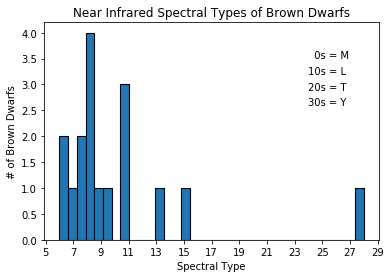

In [21]:
# Lower spectral types means that the brown dwarf is hotter
# 0s = M, L = 10s, T = 20s, Y = 30s 
# (hotter) M -> L -> T -> Y (cooler)

#Creates a histogram for Near Infrared data

plt.hist(NIR_spectraltype["spectral_type"], bins, edgecolor = "black", lw = 1.1, color = "tab:blue")
plt.title("Near Infrared Spectral Types of Brown Dwarfs") 
plt.xlabel("Spectral Type")
plt.xticks(range(5, 30, 2))
plt.ylabel("# of Brown Dwarfs")
plt.annotate("  0s = M", 
            xy = (24, 3.5))
plt.annotate("10s = L", 
            xy = (24, 3.2))
plt.annotate("20s = T", 
            xy = (24, 2.9))
plt.annotate("30s = Y", 
            xy = (24, 2.6))
plt.savefig("NIR_Histogram.png", dpi = 1000)
plt.show()

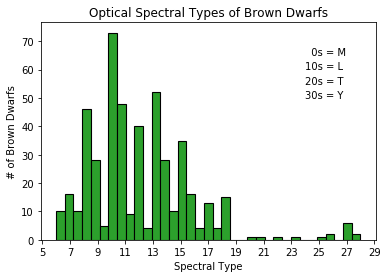

In [22]:
#Creates a histogram for Optical data

plt.hist(OPT_spec, bins, edgecolor = "black", lw = 1.1, color = "tab:green")
plt.title("Optical Spectral Types of Brown Dwarfs")
plt.xlabel("Spectral Type")
plt.xticks(range(5, 31, 2))
plt.ylabel("# of Brown Dwarfs")
plt.annotate("  0s = M", 
            xy = (24, 65))
plt.annotate("10s = L", 
            xy = (24, 60))
plt.annotate("20s = T", 
            xy = (24, 55))
plt.annotate("30s = Y", 
            xy = (24, 50))
plt.savefig("OPT_Histogram.png", dpi = 1000)
plt.show()

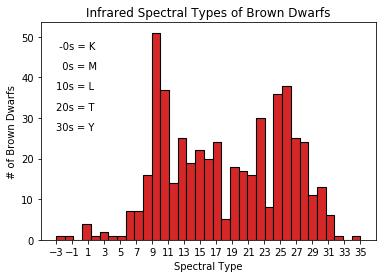

In [23]:
#Creates a histogram for Infrared data
#K stars are more hot than M stars

plt.hist(IR_spec, bins, edgecolor = "black", lw = 1.1, color = "tab:red")
plt.title("Infrared Spectral Types of Brown Dwarfs")
plt.xlabel("Spectral Type")
plt.xticks(range(-3, 37, 2))
plt.ylabel("# of Brown Dwarfs")
plt.annotate(" -0s = K", 
            xy = (-3, 47))
plt.annotate("  0s = M", 
            xy = (-3, 42))
plt.annotate("10s = L", 
            xy = (-3, 37))
plt.annotate("20s = T", 
            xy = (-3, 32))
plt.annotate("30s = Y", 
            xy = (-3, 27))
plt.savefig("IR_Histogram.png", dpi = 1000)
plt.show()

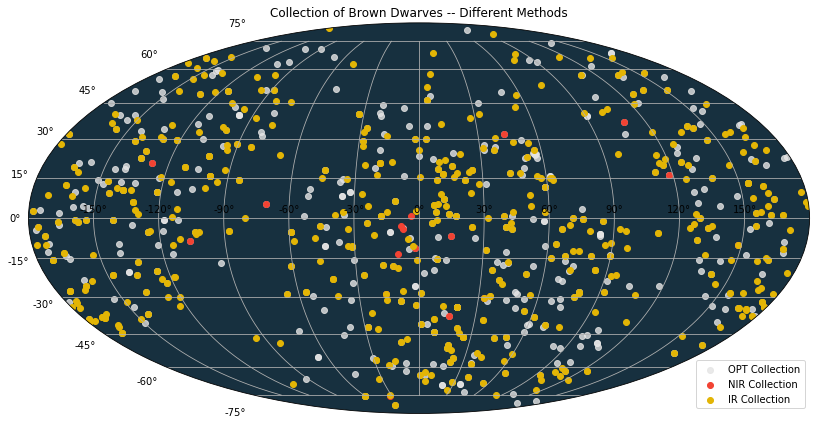

In [19]:
#Imports all libraries needed to get coordinates for plotting

import pandas as pd
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

# ===============================================
# Plotting coordinates
# ===============================================

# converting OPT coordinates for plot
OPT_ra = coord.Angle(pd.to_numeric(OPT_spectraltype['ra']).fillna(np.nan).values*u.degree) #RA = right ascension
OPT_ra = OPT_ra.wrap_at(180*u.degree)
OPT_dec = coord.Angle(pd.to_numeric(OPT_spectraltype['dec']).fillna(np.nan).values*u.degree) #Dec = Declanation

# converting matches csv coordinates
NIR_ra = coord.Angle(NIR_spectraltype['ra'].values*u.degree)
NIR_ra = NIR_ra.wrap_at(180*u.degree)
NIR_dec = coord.Angle(NIR_spectraltype['dec'].values*u.degree)

# converting new_objects csv coordinates
IR_ra = coord.Angle(IR_spectraltype['ra'].values*u.degree)
IR_ra = IR_ra.wrap_at(180*u.degree)        
IR_dec = coord.Angle(IR_spectraltype['dec'].values*u.degree)

#Creates a graph of the sky with all data, but distinguishes what method was used
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')
plt.grid(True)
ax.scatter(OPT_ra.radian, OPT_dec.radian, color="#E5E5E5", alpha=.8, edgecolors='face', label='OPT Collection')
ax.scatter(NIR_ra.radian, NIR_dec.radian, color="#F24333", label='NIR Collection')
ax.scatter(IR_ra.radian, IR_dec.radian, color="#E3B505", label='IR Collection')
ax.legend(loc=4)
ax.set_title("Collection of Brown Dwarves -- Different Methods")
plt.savefig("DiffMethods_BD.png", dpi = 1000)
plt.show()

Gap in data because it is hard to look through all the dust and space debris that is on our galactic place

Easier to look North and South and collect data from that

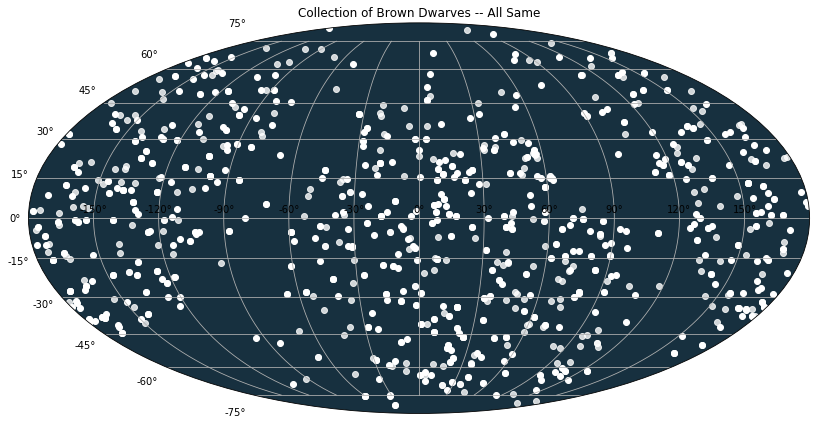

In [20]:
#Creates a graph w/o distinguishing which method of collection was used
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.set_facecolor('#17303F')
plt.grid(True)
ax.scatter(OPT_ra.radian, OPT_dec.radian, c="white", alpha=.8, edgecolors='face')
ax.scatter(NIR_ra.radian, NIR_dec.radian, c="white")
ax.scatter(IR_ra.radian, IR_dec.radian, c="white")
ax.set_title("Collection of Brown Dwarves -- All Same")
plt.savefig("ALL_BD.png", dpi = 1000)
plt.show()